In [5]:
#Install Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [6]:
df=pd.read_csv('laptop_price.csv',encoding='latin1')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


0                       Intel Core i5
1                       Intel Core i5
2                       Intel Core i5
3                       Intel Core i7
4                       Intel Core i5
                    ...              
1298                    Intel Core i7
1299                    Intel Core i7
1300    Intel Celeron Dual Core N3050
1301                    Intel Core i7
1302    Intel Celeron Dual Core N3050
Name: Cpu_Type, Length: 1303, dtype: object
0       2.3GHz
1       1.8GHz
2       2.5GHz
3       2.7GHz
4       3.1GHz
         ...  
1298    2.5GHz
1299    2.5GHz
1300    1.6GHz
1301    2.5GHz
1302    1.6GHz
Name: Cpu_Speed, Length: 1303, dtype: object
0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu_Speed1, Length: 1303, dtype: object
0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301  

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

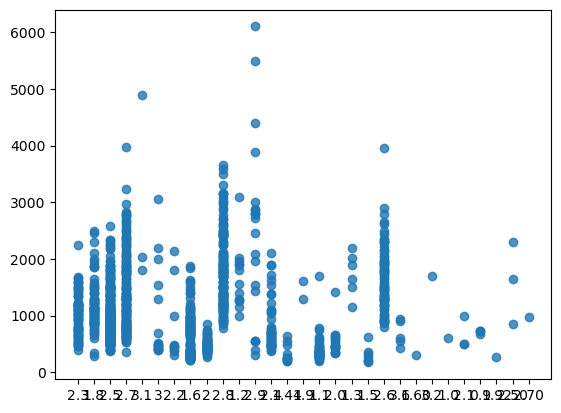

In [82]:
# Task 1 - Visualize individual feature patterns

#Continuous valued features
#Generate regression plots for each of the parameters "Cpu", "ScreenResolution" and "Weight" against "Price_euros". Also, print the value of correlation of each feature with "Price".
df[['Cpu_Type', 'Cpu_Speed']] = df['Cpu'].str.extract(r'([a-zA-Z\s]+\d+)\s*\w*\s([\d\.]+GHz)')

print(df['Cpu_Type'])
print(df['Cpu_Speed'])
df['Cpu_Speed1'] = df['Cpu_Speed'].str.strip('GHz')
print(df['Cpu_Speed1'])
print(df['Price_euros'])
sns.regplot(x="Cpu_Speed1", y="Price_euros", data=df)

plt.ylim(0,)



(0.0, 6395.25)

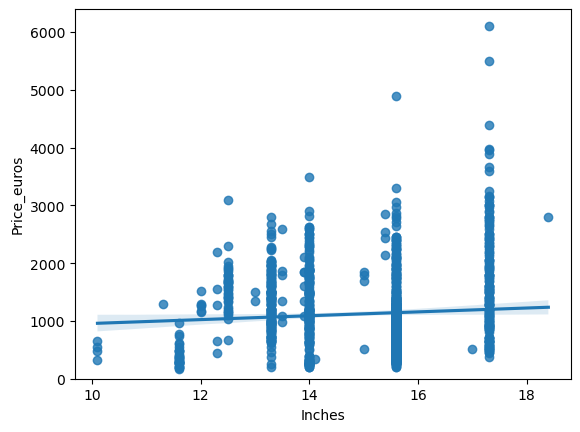

In [84]:
sns.regplot(x="Inches", y="Price_euros", data=df)
plt.ylim(0,)

In [87]:
for param in ["Inches", "Memory","Weight"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price_euros"]].corr())

Correlation of Price and Inches is                 Inches  Price_euros
Inches       1.000000     0.068197
Price_euros  0.068197     1.000000
Correlation of Price and Memory is               Price_euros
Price_euros          1.0
Correlation of Price and Weight is               Price_euros
Price_euros          1.0


C:\Users\SilverOak\AppData\Local\Temp\ipykernel_24812\2118471612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Correlation of Price and {param} is ", df[[param,"Price_euros"]].corr())
C:\Users\SilverOak\AppData\Local\Temp\ipykernel_24812\2118471612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Correlation of Price and {param} is ", df[[param,"Price_euros"]].corr())


<Axes: xlabel='Company', ylabel='count'>

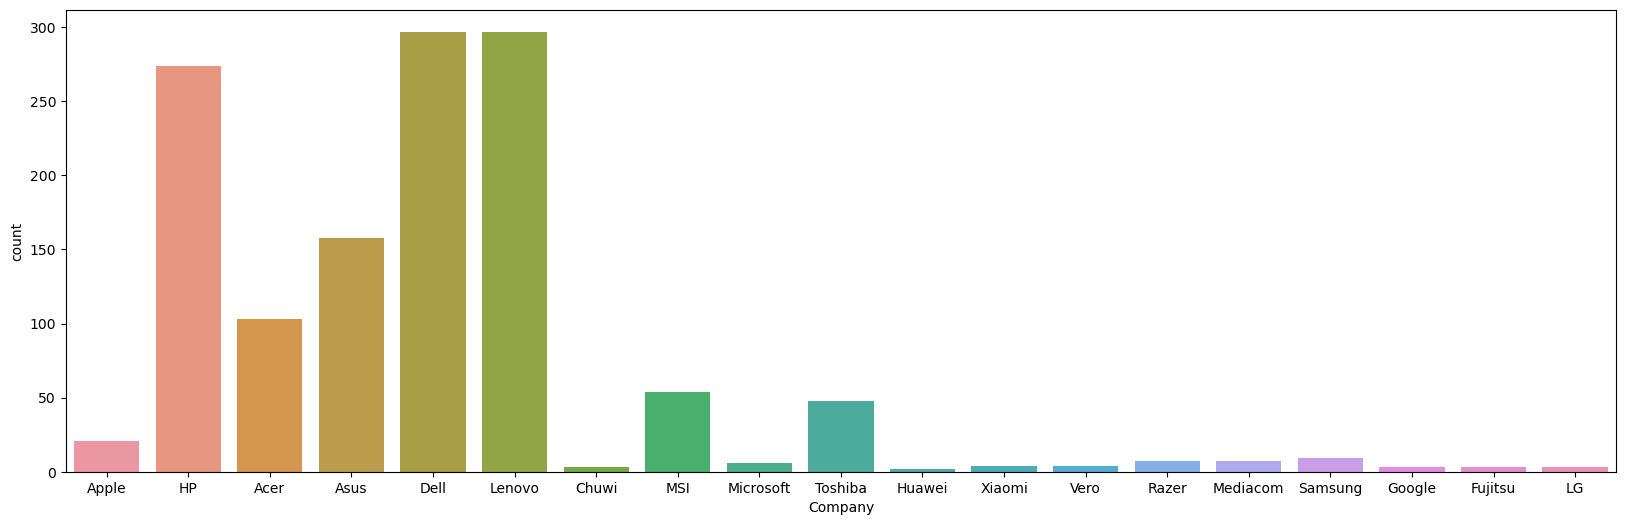

In [89]:
#Categorical features
#Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

df['Company'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=df, ax=ax)

In [92]:
#Splitting 'ScreenResolution' Column:
new = df["ScreenResolution"].str.split("x", n = 1, expand = True) 
#Creating 'X_res' and 'Y_res' Columns:
df["X_res"]= new[0]
df["Y_res"]= new[1]
#Converting 'Y_res' to Numeric and Float:
df["Y_res"]= pd.to_numeric(df["Y_res"])
df["Y_res"]= df["Y_res"].astype(float)
#Extracting Numeric Values from 'X_res':
df["X_res"]=(df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
df["X_res"]=pd.to_numeric(df["X_res"])

df["ScreenResolution"]=(df["X_res"]*df["Y_res"]).astype(float)


In [151]:
#preprocessing
df['Memory'] = df['Memory'].astype(str).replace('.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'D', '')
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'D', '')
#binary encoding
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#only keep integert(digits)
df['second'] = df['second'].str.replace(r'D', '')
#convert to numeric
df["first"] = pd.to_numeric(df["first"], errors='coerce').fillna(0)
df["second"] = pd.to_numeric(df["second"], errors='coerce').fillna(0)
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
#finalize the columns by keeping value
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
#Drop the un required columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [96]:
df["Ram"] = df["Ram"].str.replace('GB', '')
df["Weight"] = df["Weight"].str.replace('kg', '')

In [113]:
#Task 2 - Descriptive Statistical Analysis
print(df.describe())
print(df.describe(include=['object']))

         laptop_ID       Inches  ScreenResolution  Memory  Price_euros  \
count  1303.000000  1303.000000      1.303000e+03     0.0  1303.000000   
mean    660.155794    15.017191      2.168807e+06     NaN  1123.686992   
std     381.172104     1.426304      1.391292e+06     NaN   699.009043   
min       1.000000    10.100000      1.049088e+06     NaN   174.000000   
25%     331.500000    14.000000      1.440000e+06     NaN   599.000000   
50%     659.000000    15.600000      2.073600e+06     NaN   977.000000   
75%     990.500000    15.600000      2.073600e+06     NaN  1487.880000   
max    1320.000000    18.400000      8.294400e+06     NaN  6099.000000   

             X_res        Y_res  first       second  Layer1HDD  ...  \
count  1303.000000  1303.000000    0.0   208.000000     1303.0  ...   
mean   1894.784344  1070.830391    NaN   231.346154        0.0  ...   
std     494.641028   284.519410    NaN   146.696820        0.0  ...   
min    1366.000000   768.000000    NaN    64.0000

In [7]:
#Task 3 - GroupBy and Pivot Tables
df_gptest = df[['Company','Ram','Price_euros']]
grouped_test1 = df_gptest.groupby(['Company','Ram'],as_index=False).mean()
print(grouped_test1)

    Company   Ram  Price_euros
0      Acer  12GB   787.330000
1      Acer  16GB  2033.000000
2      Acer   2GB   234.333333
3      Acer   4GB   449.910702
4      Acer   6GB   479.000000
..      ...   ...          ...
65  Toshiba   8GB  1279.400000
66     Vero   2GB   210.800000
67     Vero   4GB   219.633333
68   Xiaomi  16GB  1399.950000
69   Xiaomi   8GB  1044.633333

[70 rows x 3 columns]


In [8]:
grouped_pivot = grouped_test1.pivot(index='Company',columns='Ram')
print(grouped_pivot)

           Price_euros                                                \
Ram               12GB         16GB    24GB         2GB         32GB   
Company                                                                
Acer        787.330000  2033.000000     NaN  234.333333          NaN   
Apple              NaN  2493.847500     NaN         NaN          NaN   
Asus       1111.180000  1845.051429  2118.5  227.725000  2656.000000   
Chuwi              NaN          NaN     NaN         NaN          NaN   
Dell        991.814000  1875.251296     NaN  379.000000  3150.922857   
Fujitsu            NaN          NaN     NaN         NaN          NaN   
Google             NaN  2199.000000     NaN         NaN          NaN   
HP         1637.000000  1862.153846     NaN  231.000000          NaN   
Huawei             NaN          NaN     NaN         NaN          NaN   
LG                 NaN  2099.000000     NaN         NaN          NaN   
Lenovo     1381.166667  1930.614872  2382.0  248.090000  3600.66

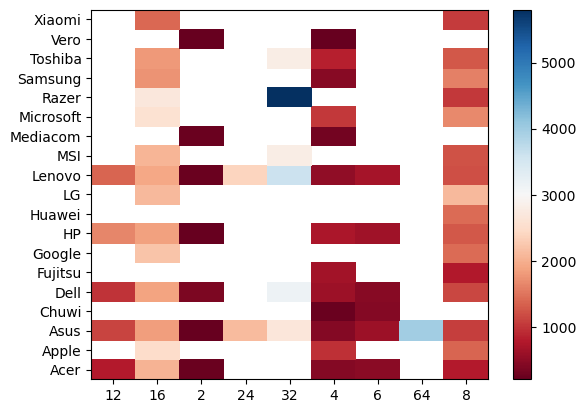

In [158]:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [157]:
#Task 4 - Pearson Correlation and p-values
for param in ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Test', 'newCol', 'Cpu_Type', 'Cpu_Speed', 'Cpu_Speed1',
       'X_res', 'Y_res', 'first', 'second', 'Layer1HDD', 'Layer1SSD',
       'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD',
       'Layer2Hybrid', 'Layer2Flash_Storage', 'Total_Memory', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price_euros'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

laptop_ID
The Pearson Correlation Coefficient for  laptop_ID  is 0.06783032876361068  with a P-value of P = 0.014327393501873523


TypeError: unsupported operand type(s) for +: 'float' and 'str'

<Axes: xlabel='Ips', ylabel='Price_euros'>

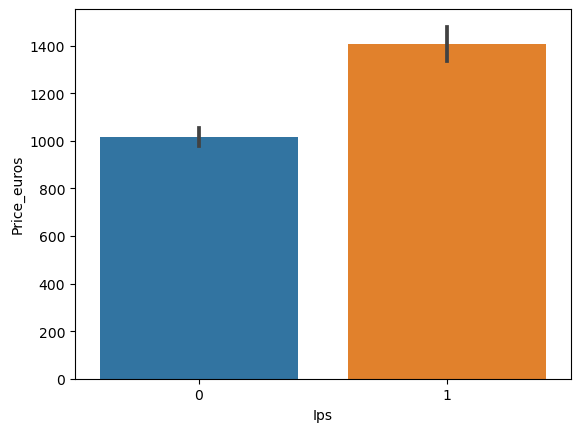

In [9]:
#extract IPS column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=df['Ips'],y=df['Price_euros'])

C:\Users\SilverOak\AppData\Local\Temp\ipykernel_24812\2697717380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


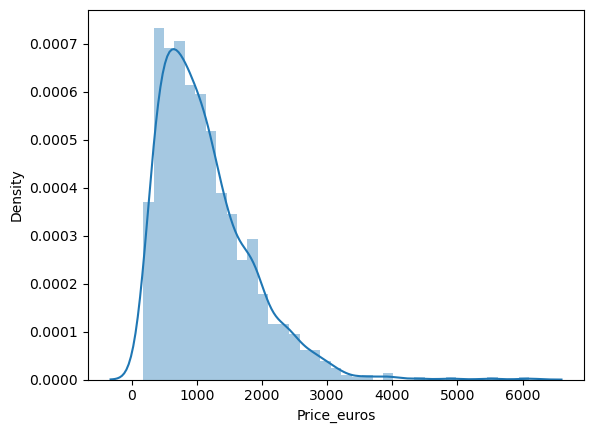

In [130]:
sns.distplot(df['Price_euros'])
plt.show()


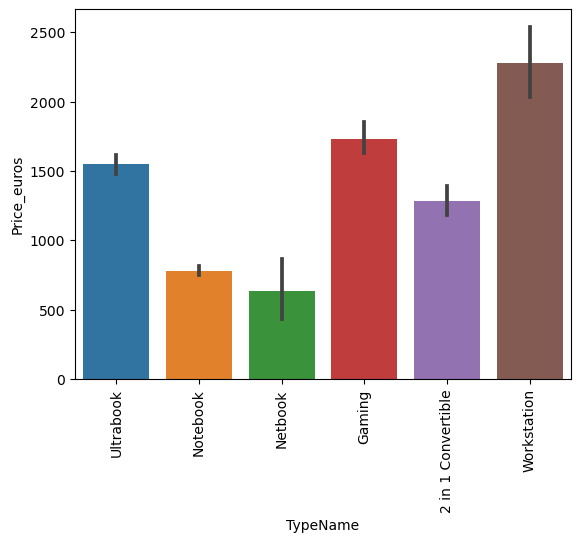

In [132]:
df['TypeName'].value_counts().plot(kind='bar')
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation="vertical")
plt.show()


<Axes: xlabel='Inches', ylabel='Price_euros'>

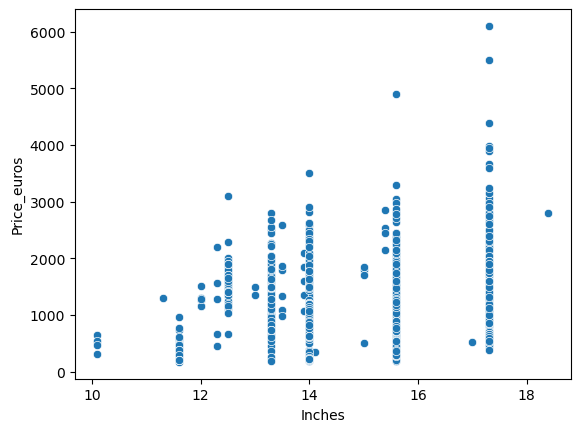

In [135]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

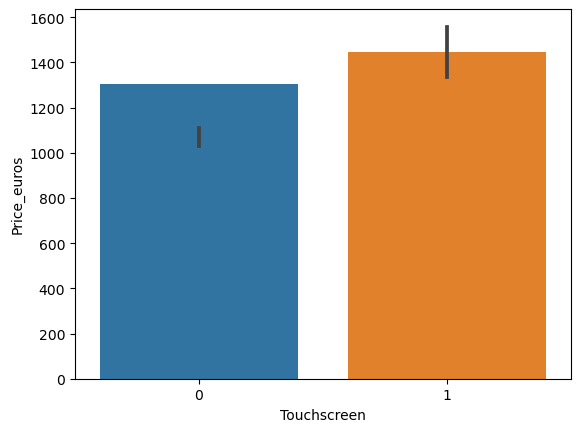

In [137]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#how many laptops in data are touchscreen
sns.countplot(df['Touchscreen'])
#Plot against price
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [140]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))


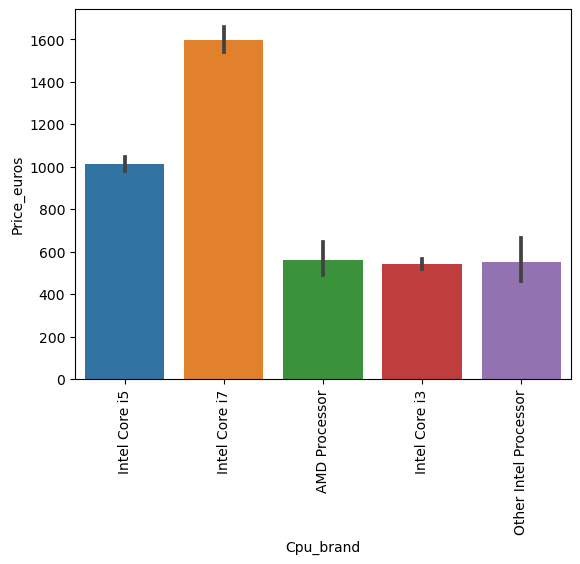

In [142]:
sns.barplot(x=df['Cpu_brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [152]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os'] = df['OpSys'].apply(cat_os)
df.drop(columns=['OpSys'],inplace=True)

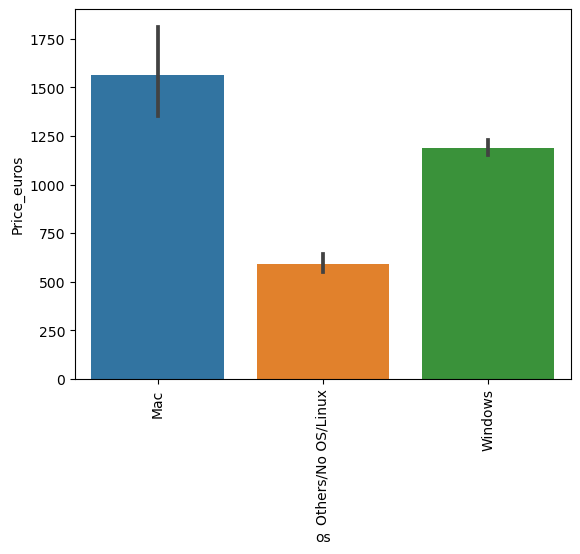

In [155]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

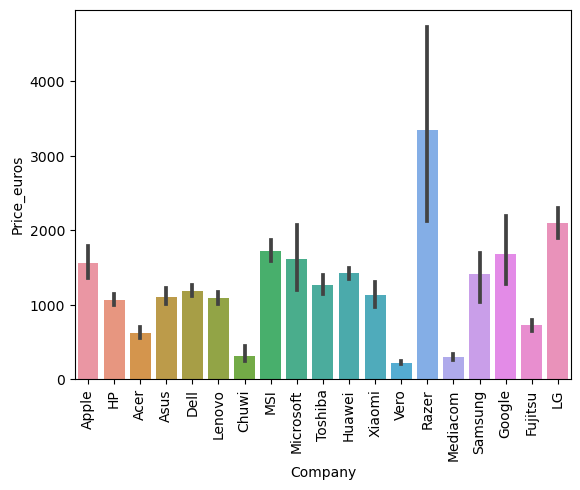

In [156]:
df['Company'].value_counts().plot(kind='bar')
sns.barplot(x=df['Company'], y=df['Price_euros'])
plt.xticks(rotation="vertical")
plt.show()